In [33]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

## esercizio 1
Given the following dataframe of sales transactions
- create a new column with the number of days since the last sales
- add missing dates, filling missing values for sales_amount with 0
- create a new column with the sale amount of 7 days before
- create a new column with the mean amount of sales for the previous 7 days
- convert the frequency to weekly, summing the sales for each week

In [34]:
data = {
    "date": [
        "2023-05-01", "2023-05-02",
        "2023-05-05", "2023-05-07",
        "2023-05-10", "2023-05-15",
        "2023-05-20", "2023-05-25",
        "2023-05-30", "2023-05-31"
    ],
    "sales_amount": [100, 150, 200, 130, 180, 250, 300, 220, 270, 310]
}

df = pd.DataFrame(data)

In [35]:
# Conversione della colonna 'date' in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Calcolare i giorni che passano tra una vendita e la successiva
df['days_between_sales'] = df['date'].diff().dt.days

# Rimuovere le righe con valori NaN (per la prima vendita, che non ha un precedente)
df = df.dropna(subset=['days_between_sales'])

# Aggiungere le date mancanti con sales_amount 0
all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
df_full = pd.DataFrame({'date': all_dates})
df_full = df_full.merge(df, on='date', how='left').fillna({'sales_amount': 0})
#nuova colonna con la quantità di vendite nei sette giorni precedenti
df['sales_per_week'] = df['sales_amount'].rolling(window=7).sum()
# Aggiungere la colonna con l'importo medio delle vendite dei 7 giorni precedenti
# aggiungendo min_period=1 la media può essere calcolata anche per un numero inferiore a 7 giorni
df_full['avg_sales_7_days'] = df_full['sales_amount'].rolling(window=7, center= False).mean()
df_full

,date,sales_amount,days_between_sales,avg_sales_7_days
0,2023-05-02,150.0,1.0,NaN
1,2023-05-03,0.0,NaN,NaN
2,2023-05-04,0.0,NaN,NaN
3,2023-05-05,200.0,3.0,NaN
4,2023-05-06,0.0,NaN,NaN
5,2023-05-07,130.0,2.0,NaN
6,2023-05-08,0.0,NaN,68.571429
7,2023-05-09,0.0,NaN,47.142857
8,2023-05-10,180.0,3.0,72.857143
9,2023-05-11,0.0,NaN,72.857143


In [36]:
# Convertire la frequenza in settimanale e sommare le vendite per settimana
df_full.set_index('date', inplace=True)
df_weekly = df_full.resample('W').agg({'sales_amount': 'sum'})
df_weekly

,sales_amount
date,
2023-05-07,480.0
2023-05-14,180.0
2023-05-21,550.0
2023-05-28,220.0
2023-06-04,580.0


## esericio 2
Given the following sales data
Use the appropriate Exponential Smoothing model to forecast sales for the following 7 days.
Bonus: plot the historical data and the generated forecast.

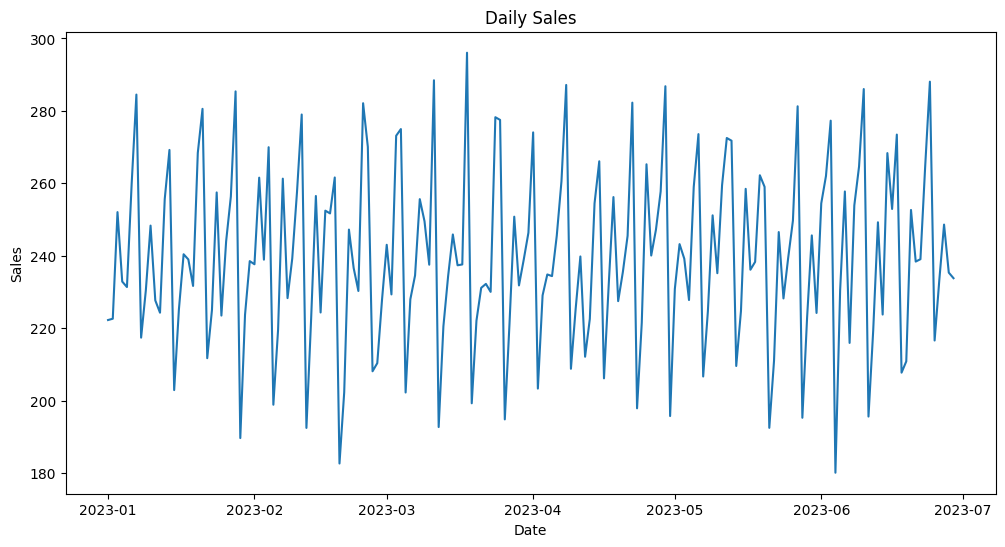

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

date_range = pd.date_range(start="2023-01-01", periods=180, freq="D")
values = np.array([200, 220, 250, 230, 240, 260, 280], dtype=float)
sales = np.tile(values, len(date_range) // 7 + 1)[:len(date_range)]
sales += np.random.normal(0, 10, len(sales))
df = pd.DataFrame({"date": date_range, "sales": sales})
df.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales")
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

C:\Users\franc\PycharmProjects\DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


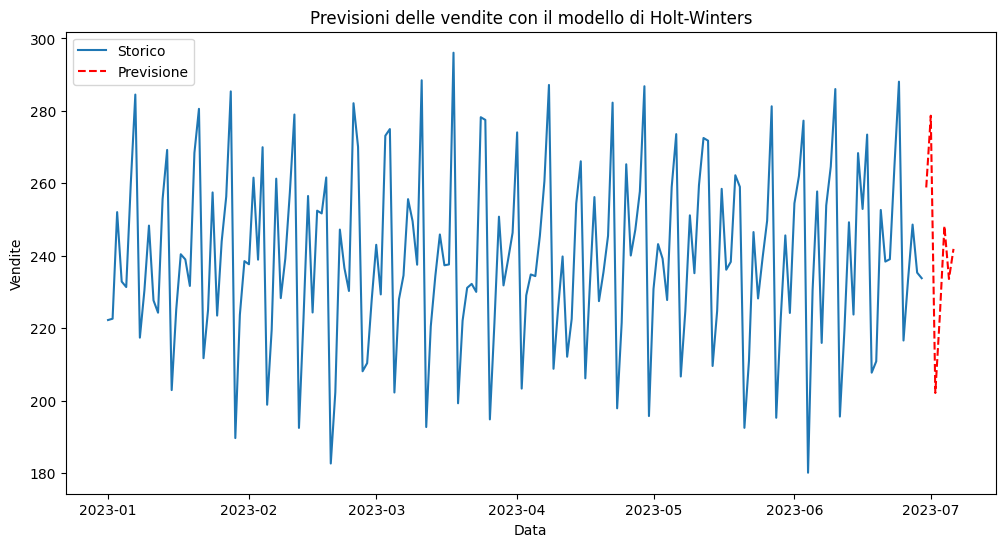

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Creazione e addestramento del modello di Holt-Winters
model = ExponentialSmoothing(df['sales'], trend='add', seasonal='add', seasonal_periods=7)
hw_fit = model.fit()

# Previsioni per i prossimi 7 giorni
forecast = hw_fit.forecast(steps=7)

# Creazione di un DataFrame per le previsioni
forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
forecast_df = pd.DataFrame({"date": forecast_dates, "sales": forecast})

# Tracciamento dei dati storici e delle previsioni
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='sales', label='Storico')
sns.lineplot(data=forecast_df, x='date', y='sales', label='Previsione', color='red', linestyle='--')
plt.title("Previsioni delle vendite con il modello di Holt-Winters")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.legend()
plt.show()